In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import os


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_train.npy")).to(torch.float)#.to(device)
X_test = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_test.npy")).to(torch.float)#.to(device)
X_val = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/X_val.npy")).to(torch.float)#.to(device)

y_train = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/y_train.npy")).to(torch.float)#.to(device)
y_val = torch.from_numpy(np.load("/kaggle/input/solvrocompetition/y_val.npy")).to(torch.float)#.to(device)

In [3]:
y_train.shape, X_train.shape

(torch.Size([151166, 26]), torch.Size([151166, 28, 28]))

In [4]:
X_train[0].shape, X_val[0].shape, y_train[0].shape, y_val[0].shape

(torch.Size([28, 28]),
 torch.Size([28, 28]),
 torch.Size([26]),
 torch.Size([26]))

In [5]:
y_train[0], y_train[0].nonzero(), y_val[0].shape, X_val.shape

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([[20]]),
 torch.Size([26]),
 torch.Size([37792, 28, 28]))

In [6]:
y_train_labels = torch.argmax(y_train, dim=1).squeeze()
y_val_labels = torch.argmax(y_val, dim=1).squeeze()
# Print the converted tensor
# print(len(y_train_labels))
# print(len(y_train))
# print(len(y_val))
# print(len(y_val_labels))
print(y_train.shape)
print(y_train_labels.shape)
print(y_val.shape)
print(y_val_labels.shape)


torch.Size([151166, 26])
torch.Size([151166])
torch.Size([37792, 26])
torch.Size([37792])


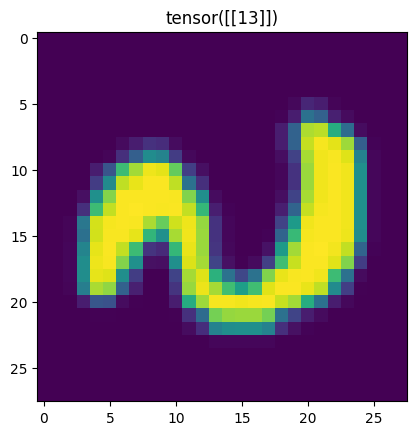

In [7]:
random_index = torch.randint(0, len(X_train), size=[1]).item()
face1 = X_train[random_index].to("cpu").reshape(28,28)
plt.imshow(face1)
plt.title(y_train[random_index].nonzero())
plt.show()

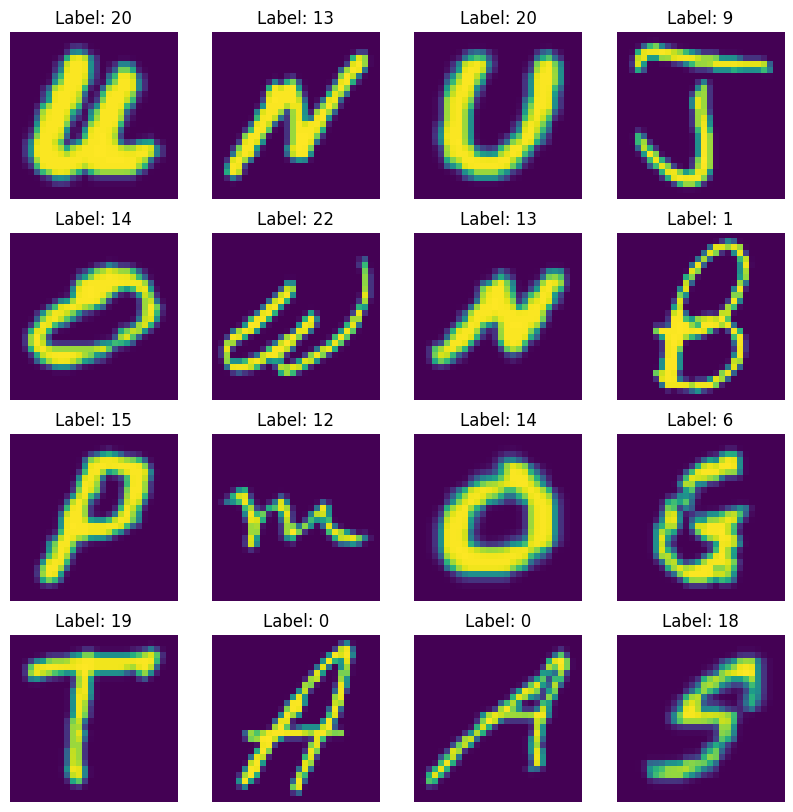

In [8]:
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(X_train), size=[1]).item()
    face1 = X_train[random_index].to("cpu").reshape(28,28)
    fig.add_subplot(rows, cols, i)
    label = y_train[random_index]
    plt.imshow(face1)
    plt.title("Label: " + str(label.nonzero().item()))
    plt.axis(False);

In [9]:
X_train.unsqueeze(1)[0].shape
# X_val[0].shape

torch.Size([1, 28, 28])

In [10]:
# Convert y_train into a tensor of classes
classes_tensor = torch.argmax(y_train)

classes_tensor, y_train

(tensor(20),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]))

In [11]:
print(X_val.unsqueeze(1).size())
print(y_val.size())
print(y_val_labels.size())

from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train.unsqueeze(1), y_train_labels)
val_dataset = TensorDataset(X_val.unsqueeze(1), y_val_labels)
# from torchvision.transforms import ToTensor
# from torchvision import datasets
# split = 'byclass'

# train_dataset = datasets.EMNIST(
#     root="data",
#     split=split,  # Specify the split here
#     train=True,
#     download=True,
#     transform=ToTensor(),
#     target_transform=None
# )

# val_dataset = datasets.EMNIST(
#     root="data",
#     split=split,  # Specify the split here
#     train=False,
#     download=True,
#     transform=ToTensor()
# )


# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# train_dataset = CustomDataset(X_train.unsqueeze(1), y_train)
# val_dataset = CustomDataset(X_val.unsqueeze(1), y_val)
# test_dataset = CustomDataset(X_test, y_test)

torch.Size([37792, 1, 28, 28])
torch.Size([37792, 26])
torch.Size([37792])


In [12]:
labels = torch.unique(y_val_labels)

In [13]:
# Get the first sample and its label from the dataset
sample, label = train_dataset[0]

# Print the shape of the sample and the label
print("Sample shape:", sample.shape)
print("Label shape:", label.shape)
print(label)

Sample shape: torch.Size([1, 28, 28])
Label shape: torch.Size([])
tensor(20)


In [14]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Długość treningowego dataloadera: {len(train_dataloader)} | wielkość batcha: {BATCH_SIZE}")
print(f"Długość walidacyjnego dataloadera: {len(val_dataloader)} | wielkość batcha: {BATCH_SIZE}")

Długość treningowego dataloadera: 4724 | wielkość batcha: 32
Długość walidacyjnego dataloadera: 1181 | wielkość batcha: 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [20]:
class_names_amount = len(y_train[0])
# print(class_names_amount)
class EMNIST_Model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, 
                    stride=1, 
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2)
      )
      self.block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )

  def forward(self, x):
    return self.classifier(self.block_2(self.block_1(x)))

model = EMNIST_Model(1, 10, class_names_amount).to(device)
model

EMNIST_Model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=26, bias=True)
  )
)

In [21]:
# next(iter(val_dataloader)).shape, next(iter(train_dataloader)).shape,X_test.unsqueeze(1).shape

In [22]:
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> [torch.float]:
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

EPOCHS = 4

In [23]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  model.to(device)
  for batch, (X,y) in enumerate(dataloader):
    #print(X.shape)
    X, y= X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [24]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.float().to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
      )

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [25]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          val_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          epochs: int,
          device:torch.device = device):

  from timeit import default_timer as timer
  from tqdm.auto import tqdm
  train_time_start = timer()

  for epoch in tqdm(range(epochs)):
    if epoch % 200:
      print(f"Epochs: {epoch}\n-----------------------")

    train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(model=model,
              dataloader=val_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

  train_time_end = timer()
  print(f"{(train_time_end - train_time_start):.3f}")

In [26]:
train(model=model,
      train_dataloader=train_dataloader,
      val_dataloader=val_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      epochs=EPOCHS)

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.25488 | Train accuracy: 92.93%
Test loss: 0.14538 | Test accuracy: 96.20%

Epochs: 1
-----------------------
Train loss: 0.13270 | Train accuracy: 96.44%
Test loss: 0.13472 | Test accuracy: 96.43%

Epochs: 2
-----------------------
Train loss: 0.11320 | Train accuracy: 96.95%
Test loss: 0.11437 | Test accuracy: 97.01%

Epochs: 3
-----------------------
Train loss: 0.10248 | Train accuracy: 97.26%
Test loss: 0.10954 | Test accuracy: 97.06%

51.245


In [27]:
from pprint import pprint 
# print("Wartosci, którch nauczył się model:")
pprint(model.state_dict())
print("\Oryginalne wagi i bias:") #(nie wiem jak sie tłumaczy bias)
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.0796, -0.2189, -0.0906],
          [ 0.0304, -0.2734,  0.0676],
          [-0.2441, -0.2312,  0.1750]]],


        [[[ 0.2771, -0.1698,  0.0513],
          [ 0.0132, -0.0382, -0.1521],
          [-0.0669,  0.2823, -0.0297]]],


        [[[-0.1913,  0.2589, -0.0471],
          [-0.0079, -0.0528, -0.2693],
          [-0.0445, -0.0187, -0.2859]]],


        [[[ 0.0509, -0.2493,  0.0910],
          [-0.2061, -0.1918,  0.0248],
          [-0.1378,  0.2429,  0.2439]]],


        [[[ 0.0748, -0.1053,  0.3167],
          [-0.0314,  0.1571, -0.0248],
          [-0.1624, -0.1518,  0.0634]]],


        [[[ 0.3194,  0.1037, -0.2983],
          [-0.0812, -0.2670, -0.0116],
          [-0.0625, -0.1543, -0.0780]]],


        [[[ 0.1707,  0.1771,  0.0234],
          [ 0.1741, -0.0021,  0.0905],
          [-0.2272, -0.0392, -0.2394]]],


        [[[-0.3312,  0.0452, -0.3590],
          [-0.1076, -0.1723, -0.0431],
          [ 0.3857,  0.0523

NameError: name 'weight' is not defined

In [28]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            print(sample.device)

            print(data[0].device)
            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)


In [29]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(val_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"wymiary przykładowej litery: {test_samples[0].shape}\nEtykieta dla przykładu: {test_labels[0]} ({labels[test_labels[0]]})")

wymiary przykładowej litery: torch.Size([1, 28, 28])
Etykieta dla przykładu: 2 (2)


In [30]:
pred_probs= make_predictions(model=model,
                             data=test_samples)

pred_probs[:2]

cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu
cuda:0
cpu


tensor([[1.0997e-08, 7.3475e-08, 9.9922e-01, 1.0770e-09, 5.8056e-04, 4.0182e-06,
         9.9367e-05, 4.8260e-10, 2.9298e-05, 1.6268e-07, 3.2645e-06, 3.2446e-05,
         1.5064e-10, 2.2534e-09, 8.5175e-06, 1.0380e-09, 4.5966e-06, 2.0167e-06,
         1.1403e-05, 4.1669e-10, 2.7653e-07, 1.3750e-11, 4.4472e-11, 4.5733e-09,
         8.0028e-10, 3.1711e-06],
        [3.8026e-07, 1.7132e-04, 1.7154e-03, 8.4856e-04, 2.5017e-02, 8.9421e-05,
         1.2572e-04, 1.6882e-09, 9.3648e-01, 4.1107e-04, 2.5397e-08, 4.9723e-06,
         3.2038e-09, 3.6815e-06, 1.7424e-06, 1.2143e-07, 3.1682e-02, 1.0495e-05,
         2.8515e-03, 2.7803e-04, 9.2685e-05, 3.6053e-08, 6.5810e-07, 1.0834e-04,
         1.0396e-06, 1.0226e-04]])

In [31]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([ 2,  8, 22, 12, 11, 21, 20,  7, 14])

In [32]:
test_labels, pred_classes

([tensor(2),
  tensor(8),
  tensor(22),
  tensor(12),
  tensor(11),
  tensor(21),
  tensor(20),
  tensor(7),
  tensor(14)],
 tensor([ 2,  8, 22, 12, 11, 21, 20,  7, 14]))

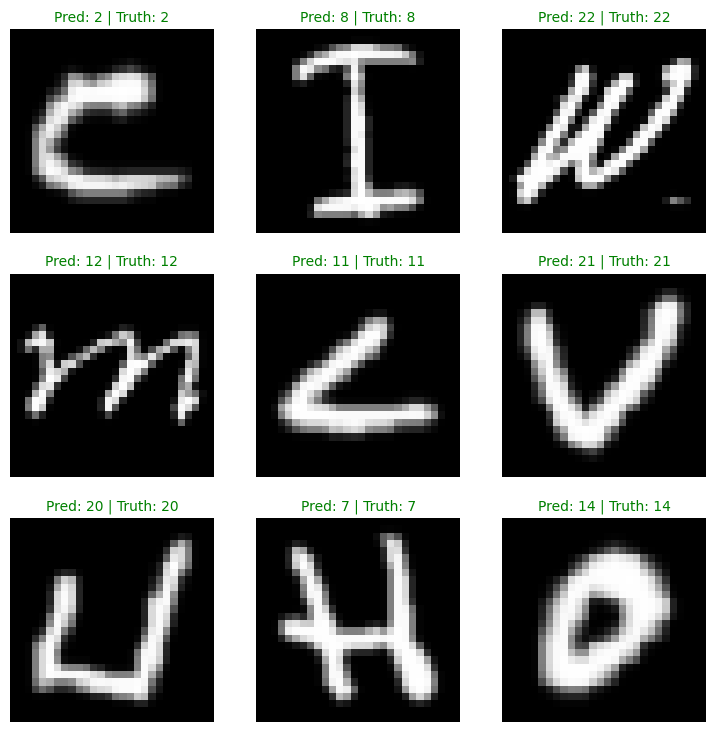

In [33]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = labels[pred_classes[i]]

  truth_label = labels[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [34]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "SOLVRO_EMNIST_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Zapisano model w: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Zapisano model w: models/SOLVRO_EMNIST_model.pth


In [38]:
model.eval()

with torch.inference_mode():
    model_preds = model(X_test.unsqueeze(1).to(device))

In [45]:
# zamieniam predykcje na np array a potem na df a potem daję do pliku csv
results = model_preds.argmax(dim=1).cpu().numpy()

sample_submission = pd.DataFrame(results, columns=['class'])
sample_submission.index.name = "index"

sample_submission.to_csv('sample_submission.csv')

In [ ]:
loaded_model = EMNIST_Model(1, 10, len(labels))

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [43]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) 

NameError: name 'loaded_model' is not defined